In [1]:
import os
import pandas as pd
import glob
import collections
import matplotlib.pyplot as plt 
%matplotlib inline


## Download raw data

I got the raw data from here:
http://wordbank.stanford.edu/data?name=item_data

In [4]:
path_8_18 = '/Users/sarahgoulding/PycharmProjects/Dispersion/WordBank/raw data/production/wordbank_8-18_Speech.csv'
path_16_30 = '/Users/sarahgoulding/PycharmProjects/Dispersion/WordBank/raw data/production/WordBank-allwords.csv'


In [5]:
df_8_18 = pd.read_csv(path_8_18)
df_16_30 = pd.read_csv(path_16_30)

In [6]:
def process_df(df):
    months = df.columns
    months = [int(m) for m in months if str(m).isdigit()]
    month_data = df.loc[:, [str(m) for m in months]]
    
    data = collections.defaultdict(list)
    for i in range(len(df)): 
        m = df.iloc[i]
        word = m.item_definition
        month_data = m[[str(v) for v in months]]
        
        data['proportion'].extend(month_data)
        data['word'].extend([word for _ in month_data])
        data['month'].extend(months)
    
    df_tidy = pd.DataFrame(data)
    return df_tidy


        

In [7]:
df_tidy = pd.concat([process_df(df_8_18), process_df(df_16_30)]).reset_index()

In [8]:
# This step takes the mean of any duplicated instances between both datasets. 
# If only one data value is available between the two, it chooses that one. 
df_table = df_tidy.pivot_table('proportion', 'word', 'month', aggfunc = 'mean') 

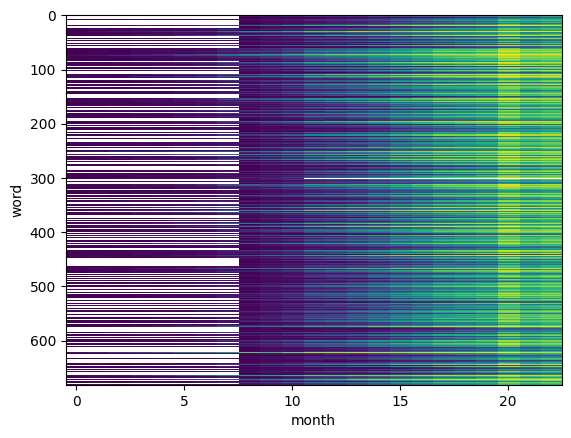

In [9]:
plt.imshow(df_table.values, aspect = 'auto',  interpolation = 'nearest')
plt.ylabel('word')
plt.xlabel('month')
plt.show()

In [10]:
df_table.to_csv('df_production.csv')

# Comprehension 

In [11]:
df_comprehension = pd.read_csv('/Users/sarahgoulding/PycharmProjects/Dispersion/WordBank/raw data/comprehension/wordbank_8-18_Comprehension.csv')

In [12]:
df_tidy_comprehension = process_df(df_comprehension)

In [15]:
df_comprehension_table = df_tidy_comprehension.pivot_table('proportion', 'word', 'month')

In [16]:
df_comprehension_table.to_csv('df_comprehension.csv')